- Les fichiers sont déjà importés dans mon folder data. Il sont au format txt.

## Import des librairies

In [53]:
import os
import yake

## Initialisation de l'extracteur de mots-clés

In [54]:
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

Les fichiers contenant les textes de chaque période sont stockés chacun dans un dossier

In [ ]:
data_path = "../data/camille_politique_culturelle_70-93/" #changer les dates du dossier pour avoir chaque période. Ici, mais également partout où des dates seront inscrite dans le code
files = [f for f in os.listdir(data_path) if f.endswith('.txt')]

In [70]:
#Afficher la nombre de fichiers textes par période
len(files)

39

## Extraire les mots-clés de tous les documents de la première période

In [5]:
for f in sorted(files)[:38]:
    text = open(os.path.join(data_path, f), 'r', encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

BE-KBR00_15463334_19681201_60_00_00_0_01_0250_29124534.txt mentions these keywords: L'ENTRE SAMBRE, Information générale, bon support, vie locale, monde lit, prospère région...
BE-KBR00_15463334_19691201_64_00_00_0_01_0266_29128250.txt mentions these keywords: CGOURRIER HEBDOMADAIRE, L'ENTRE SAMBRE, Information générale, bon support, vie locale, monde lit, prospère région...
BE-KBR00_15463334_19701201_68_00_00_0_01_0286_29156634.txt mentions these keywords: COURRIER HEBDOMADAIRE, Information générale, Familiale bed, bed Spectacles, L'ENTRE SAMBRE, bon support, prospèêre région, vie locale, monde lit...
KB_JB1051_1951-03-15_01-00004.txt mentions these keywords: dit Morrel, dit Albert, monsieur Morrel, PERSONNEL ENSEIGNANT, l'enseignement moyen, dit Debray, dit Châ, dépenses militaires, BELGICA AUSMENTE, Théo DEJACE...
KB_JB1051_1952-05-16_01-00006.txt mentions these keywords: Boris TCHIRKOV, Grand Prix, belles années, Tchirkov fut, William Wyler, TCHIRKOV BORIS, d'Espoir Grands, film it

## Nettoyer le texte et extraire les nots qui reviennent le plus 

In [57]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\durie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Nettoyer le texte du fichier d'une période 

Initialisation d'une liste de stop words pour le nettoyage des textes

In [58]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "quant", "très", "rue", "ceux", "quatre", "six", "etc", "enfin", "cas", "elles", "samedi", "mois", "tant", "agit", "ici", "hui", "beaucoup", "jour", "nombre", "très", "leur", "selon", "car", "pays", "bruxelles", "conseil", "politique", "ministre", "président", "gouvernement", "part", "cours", "ans", "leurs", "soir", "grand", "toute", "avant", "grande", "celui", "belgique", "premier", "déjà", "temps", "quelques", "lieu", "également", "point", "peu"]
sw = set(sw)


In [73]:
files = [f for f in os.listdir("../data/camille_politique_culturelle_70-93")
        if f != "_README.txt"]

txt_path = '../data/camille_politique_culturelle_70-93'


In [74]:
len(files)

38

In [75]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in files:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [76]:
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'camille70_93.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [77]:
def clean_text(folder="../data/tmp/camille70_93"):
    if folder is None:
        input_path = f"{folder}.txt"
        output_path = f"{folder}_clean.txt"
    else:
        input_path = f"{folder}.txt"
        output_path = f"{folder}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [78]:
clean_text()

'Output has been written in ../data/tmp/camille70_93_clean.txt!'

## Réaliser un nuage de mots avec le texte nettoyés.

In [64]:
with open(os.path.join(temp_path, f'camille50_70_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('GÉNÉRAL', 1312), ('ETAT', 1245), ('PRIX', 1108), ('COMMISSION', 1077), ('LOI', 1068), ('BELGE', 1055), ('TRAVAIL', 1002), ('VIE', 994), ('HEURES', 992), ('FOIS', 977)]


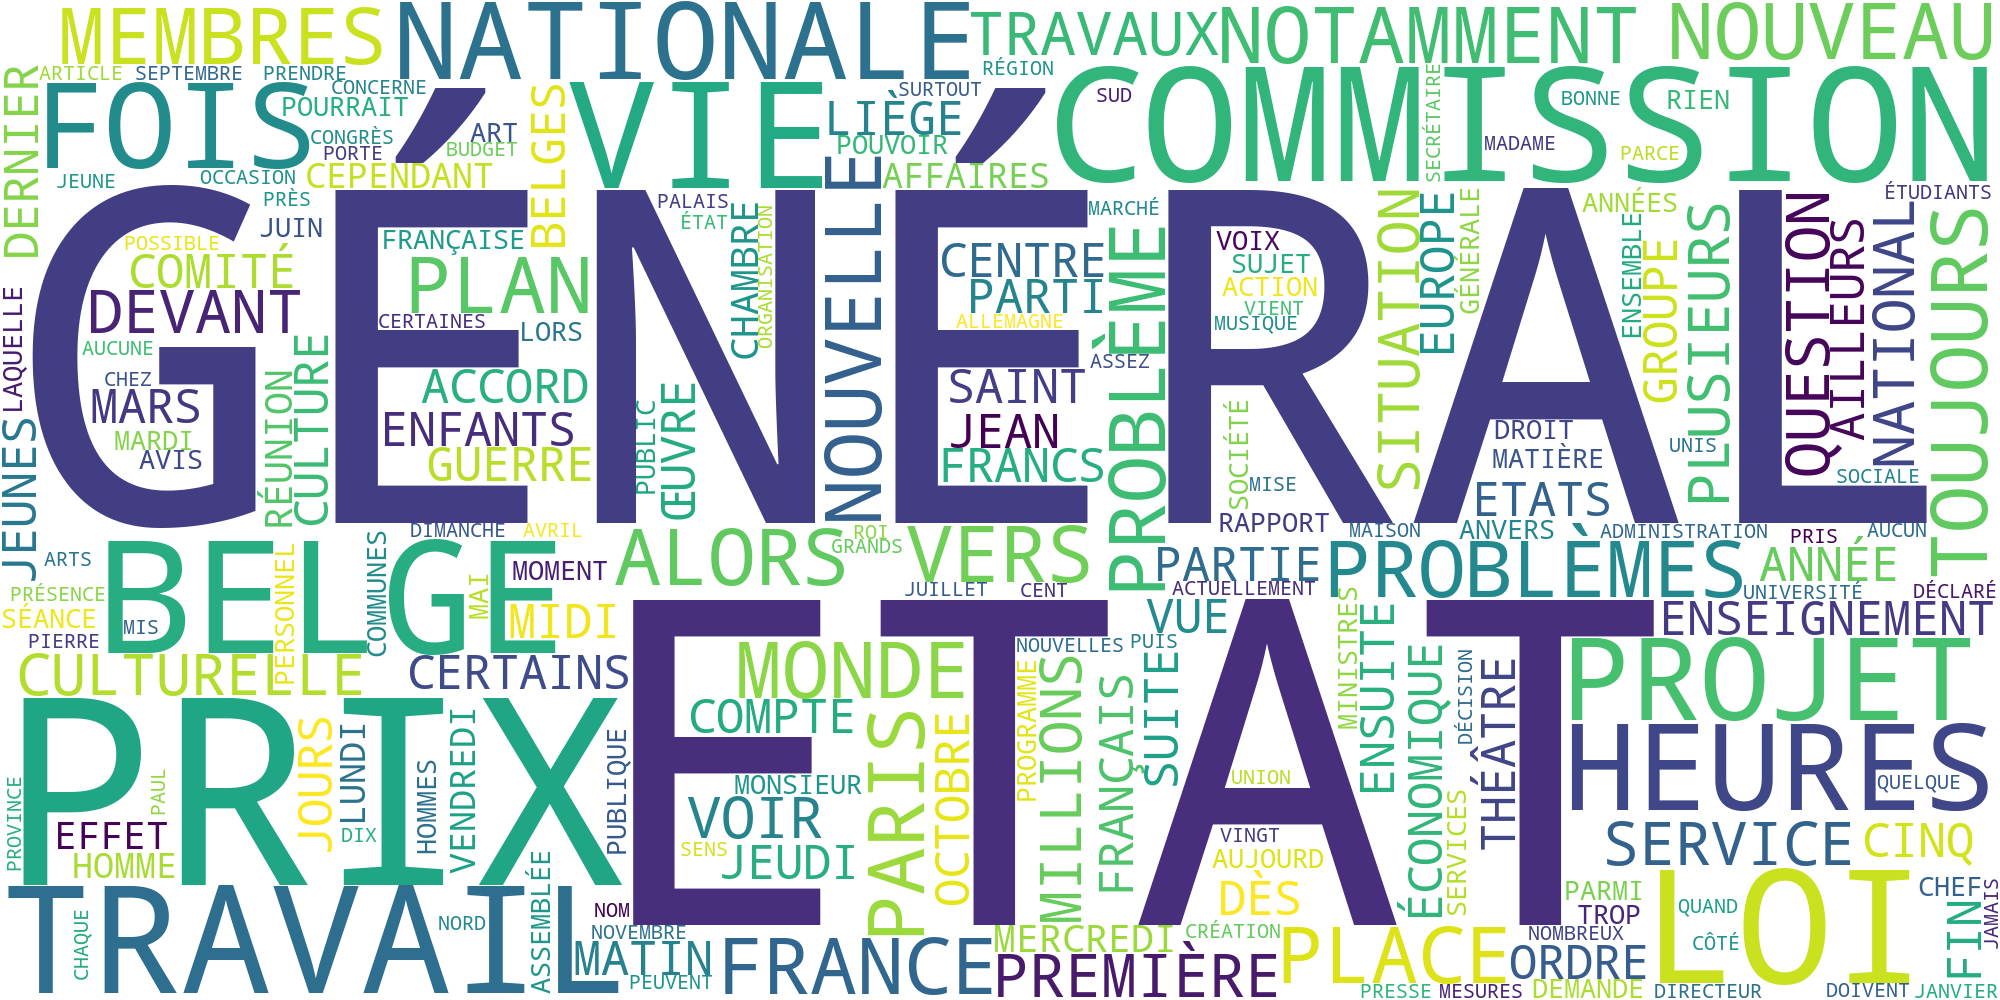

In [15]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"camille50_70.png"))
Image(filename=os.path.join(temp_path, f"camille50_70.png"))

## Reconnaissance d'entités nommées

In [38]:
from collections import defaultdict
import spacy
from spacy.lang.fr.examples import sentences
!pip install  fr_core_news_md


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
nlp = spacy.load('fr_core_news_md')

In [136]:
# Charger le texte
n=1000000
text = open("../data/tmp/camille70_93_clean.txt", encoding='utf-8').read()[:n]

In [137]:
%%time
# Traiter le texte

doc = nlp(text)

CPU times: total: 8.2 s
Wall time: 8.41 s


In [138]:
# Compter les entités
organisation = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "ORG" and len(ent.text) > 3:
        organisation[ent.text] += 1

In [139]:
# Trier et imprimer

sorted_organisation = sorted(organisation.items(), key=lambda kv: kv[1], reverse=True)

for organisation, freq in sorted_organisation[:50]:
    print(f"{organisation} apparait {freq} fois dans le corpus")

EUROPE apparait 20 fois dans le corpus
CONSTITUE apparait 16 fois dans le corpus
AUTORITÉS apparait 12 fois dans le corpus
MARDI apparait 10 fois dans le corpus
WALLON apparait 10 fois dans le corpus
MINISTÉRIEL apparait 9 fois dans le corpus
TINDEMANS apparait 9 fois dans le corpus
AJOUTE apparait 9 fois dans le corpus
SÉNATEUR apparait 8 fois dans le corpus
EFFORTS apparait 8 fois dans le corpus
VANDEN apparait 8 fois dans le corpus
REVENDICATIONS apparait 8 fois dans le corpus
ORCHESTRE apparait 7 fois dans le corpus
SAEGER apparait 7 fois dans le corpus
FLAMANDE apparait 7 fois dans le corpus
DUQUEL apparait 6 fois dans le corpus
CENTRE apparait 6 fois dans le corpus
BRUXELLOIS apparait 6 fois dans le corpus
ROBERT apparait 6 fois dans le corpus
RÉFORMES apparait 6 fois dans le corpus
APPARAÎT apparait 6 fois dans le corpus
RECTEUR apparait 6 fois dans le corpus
RAPPELANT apparait 6 fois dans le corpus
FRANÇAIS apparait 6 fois dans le corpus
NORODOM apparait 6 fois dans le corpus
C